<a href="https://colab.research.google.com/github/Julian27R/Procesamiento_Digital__de_Imagenes/blob/main/Parcial1_PID_JulianGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

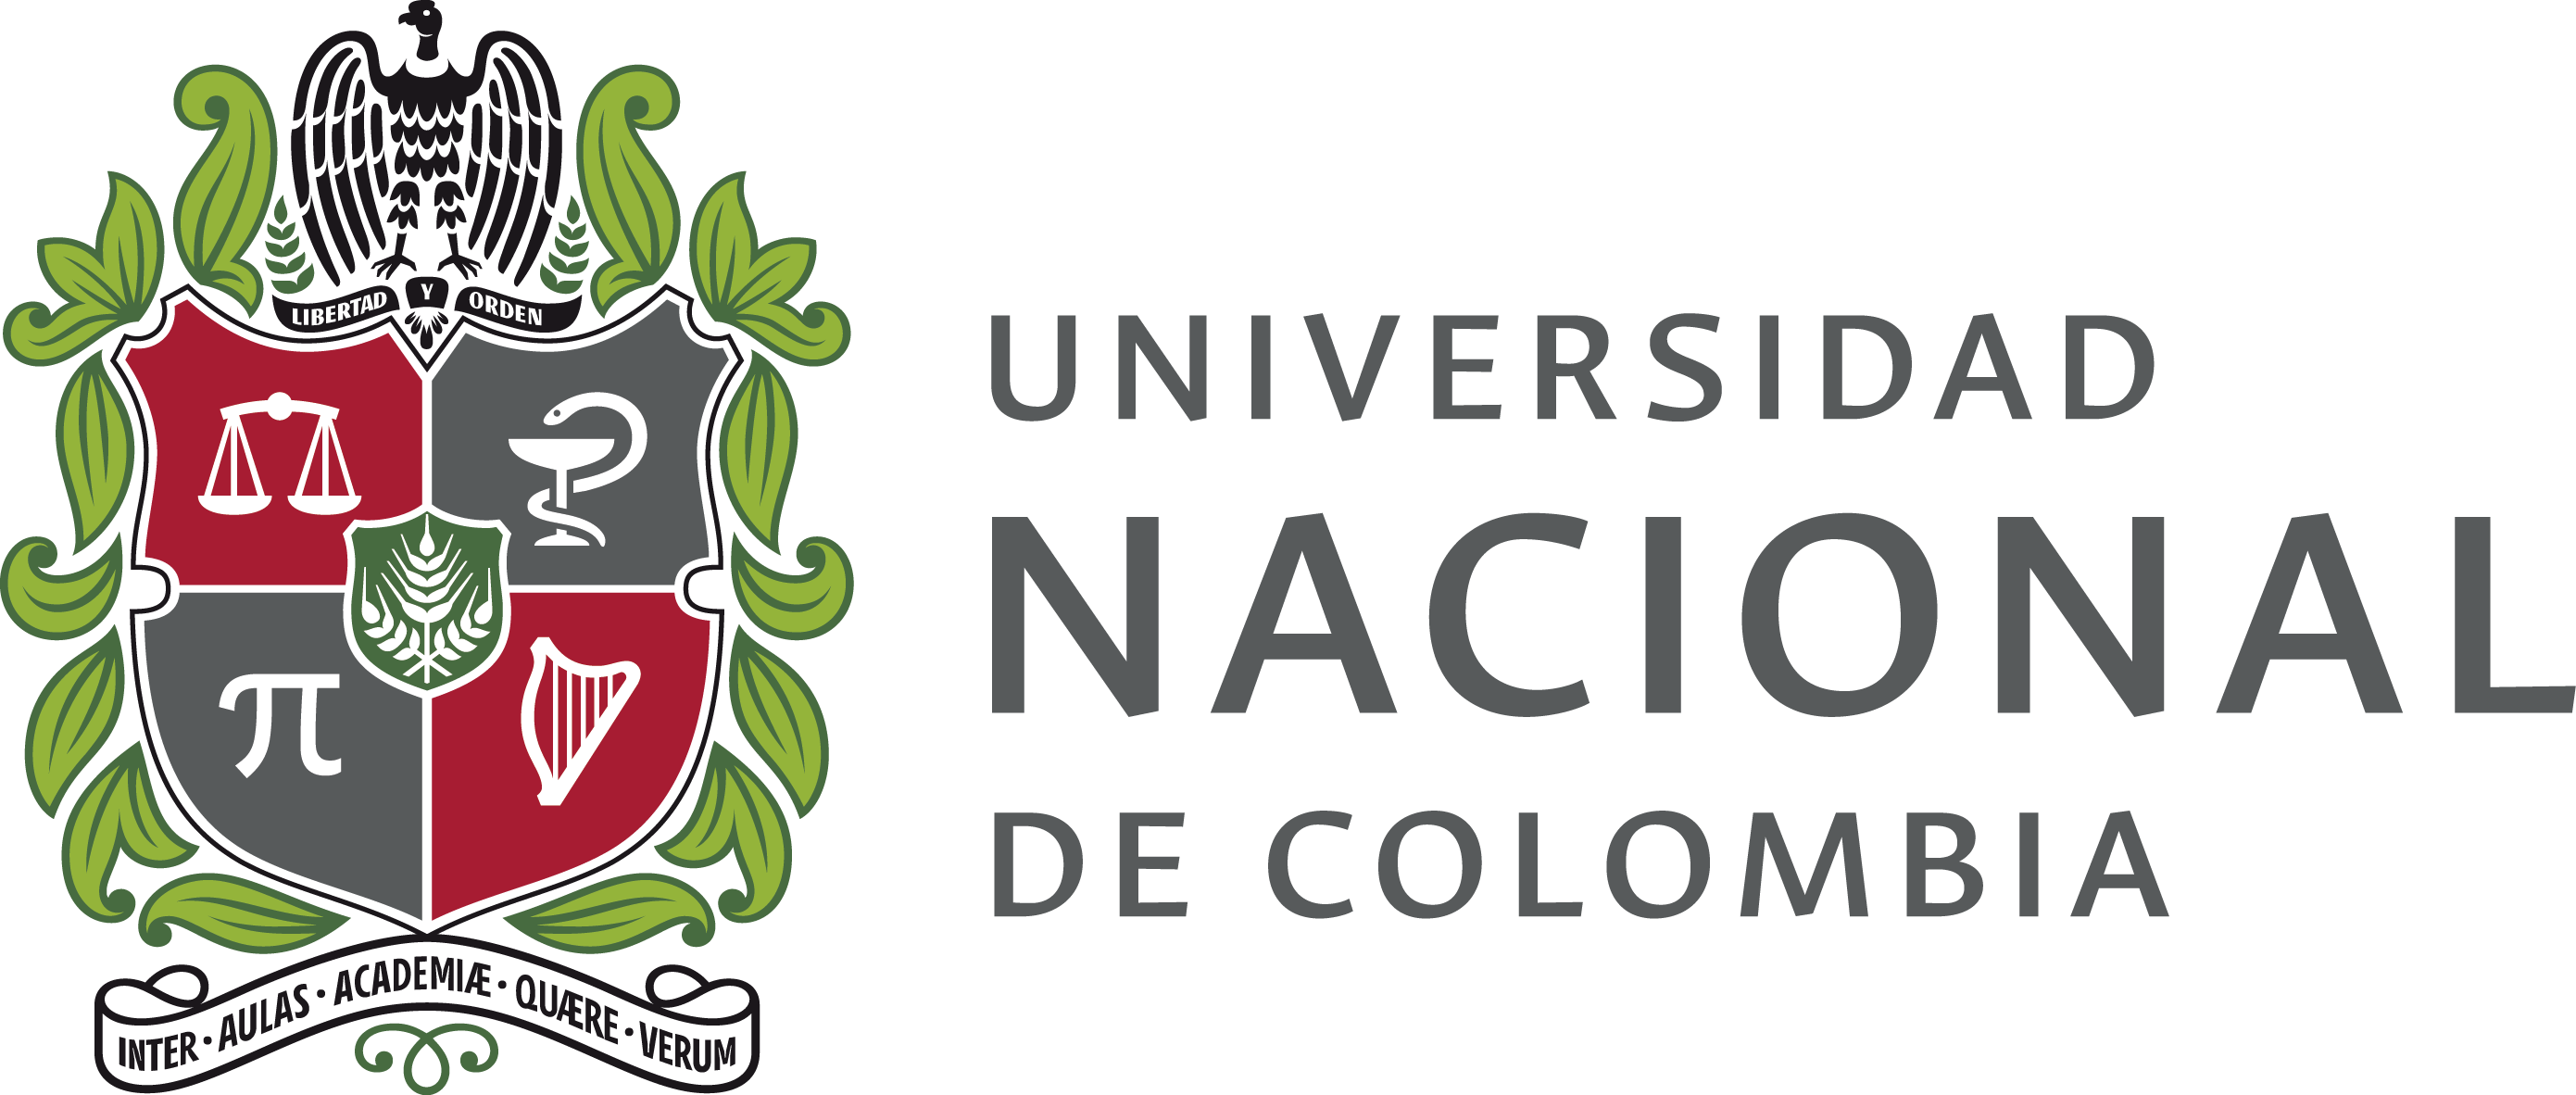
### **Universidad Nacional de Colombia sede Manizales**
#### Facultad de ingeniería y arquitectura
#### Departamento de ingeniería eléctrica, electrónica y computación
#### *Procesamiento digital de imágenes*

#### Profesor: Lucas Iturriago

#### Estudiante: Julian Felipe Gutierrez Ramirez
#### Fecha de entrega: 23/10/2025

---
## Parcial 1 Procesamiento Digital de Imágenes

Instrucciones:
* Lea atentamente cada punto antes de comenzar.
* Las imágenes mencionadas se encuentran en la carpeta Figuras correspondiente a la carpeta del Parcial 1 <a href="https://github.com/UN-GCPDS/ProcesamientoDigitalImagenes/tree/main/Parcial%201/Figuras" target="_blank" rel="noopener">Carpeta de GitHub con las Figuras</a>
* Justifique sus respuestas y comente el código explicando la lógica de su solución.
* La claridad del código y la calidad de las explicaciones serán tenidas en cuenta en la calificación.

#### **Importación de librerias:**

In [19]:
# @title
#Importación de librerias
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#### **Cargar imagenes que se Usaran en el Parcial:**

In [20]:
# @title
import os
import requests

# Carpeta de destino
dest_dir = "Figuras_Parcial1"
os.makedirs(dest_dir, exist_ok=True)

# Lista de archivos con su URL raw en GitHub
image_urls = {
    "circles.png": "https://raw.githubusercontent.com/Julian27R/Procesamiento_Digital__de_Imagenes/refs/heads/main/Parcial_1/Figuras/circles.png",
    "colored_balls.png": "https://raw.githubusercontent.com/Julian27R/Procesamiento_Digital__de_Imagenes/refs/heads/main/Parcial_1/Figuras/colored_balls.png",
    "einstein.jpg": "https://raw.githubusercontent.com/Julian27R/Procesamiento_Digital__de_Imagenes/refs/heads/main/Parcial_1/Figuras/einstein.jpg",
    "fingerprint.jpg": "https://raw.githubusercontent.com/Julian27R/Procesamiento_Digital__de_Imagenes/refs/heads/main/Parcial_1/Figuras/fingerprint.jpg"
}

def download_file(url, dest_path, chunk_size=8192, timeout=30):
    try:
        with requests.get(url, stream=True, timeout=timeout) as r:
            r.raise_for_status()
            with open(dest_path, "wb") as f:
                for chunk in r.iter_content(chunk_size=chunk_size):
                    if chunk:  # filtra keep-alive chunks
                        f.write(chunk)
        return True, None
    except Exception as e:
        return False, str(e)

results = {}
for fname, url in image_urls.items():
    out_path = os.path.join(dest_dir, fname)
    ok, err = download_file(url, out_path)
    results[fname] = "OK" if ok else f"ERROR: {err}"

---
### Punto 1: Análisis de Intensidad con Clases y NumPy

Diseñe una clase en Python llamada `AnalizadorImagen` que utilice **NumPy** para realizar operaciones básicas sobre una matriz que representa una imagen en escala de grises. La clase debe cumplir con los siguientes requisitos:

1.  **Constructor (`__init__`)**: Debe recibir una matriz de NumPy (la imagen) al ser instanciada.
2.  **Método `calcular_estadisticas()`**: Debe calcular y devolver un diccionario con las siguientes estadísticas de la imagen:
    *   `intensidad_media`: El brillo promedio de toda la imagen.
    *   `intensidad_max`: El valor del píxel más brillante.
    *   `intensidad_min`: El valor del píxel más oscuro.
3.  **Método `generar_mascara_binaria(umbral)`**: Debe recibir un valor de `umbral` (entre 0 y 255) y devolver una nueva matriz (máscara) del mismo tamaño que la original, donde los píxeles con intensidad mayor o igual al umbral sean `255` (blanco) y los demás `0` (negro).

In [21]:
#1. Se crea la Clase Personalizada
class AnalizadorImagen:

    #2. Se define el Constructor
    def __init__(self, imagen):
        self.imagen = imagen

    #3. Se define el Método para calcular las estadísticas de la imagen
    def calcular_estadisticas(self):
        # Calcula la intensidad media de la imagen
        intensidad_media = np.mean(self.imagen)

        # Calcula el valor máximo de la imagen
        intensidad_max = np.max(self.imagen)

        # Calcula el valor mínimo de la imagen
        intensidad_min = np.min(self.imagen)

        # se crea un diccionario con las estadísticas de la imagen
        estadisticas = {
            'intensidad_media': intensidad_media,
            'intensidad_max': intensidad_max,
            'intensidad_min': intensidad_min
        }
        return estadisticas

    #4. Se crea otro Método para generar mascara bianria (umbral)
    def generar_mascara_binaria(self, umbral):
        # Crea una matriz de ceros del mismo tamaño que la imagen
        mascara = np.zeros_like(self.imagen)
        # Establece los píxeles con intensidad mayor o igual al umbral en 255 (blanco)
        mascara[self.imagen >= umbral] = 255
        return mascara

---

### Punto 2: Diseño de Filtro Personalizado por Convolución

En lugar de utilizar los filtros predefinidos de OpenCV, usted debe diseñar y aplicar un **kernel de convolución personalizado** para la detección de bordes diagonales.

1.  **Diseño del Kernel**:
    *   Cree un kernel de NumPy de 3x3 que resalte los bordes en la dirección diagonal principal (de arriba-izquierda a abajo-derecha).
    *   Explique brevemente por qué la estructura de pesos de su kernel logra este efecto.
2.  **Aplicación del Filtro**:
    *   Cargue la imagen `einstein.jpg` en escala de grises.
    *   Aplique su kernel personalizado a la imagen utilizando la función `cv2.filter2D()`.
3.  **Visualización**:
    *   Muestre la imagen original y el resultado de su filtro lado a lado.


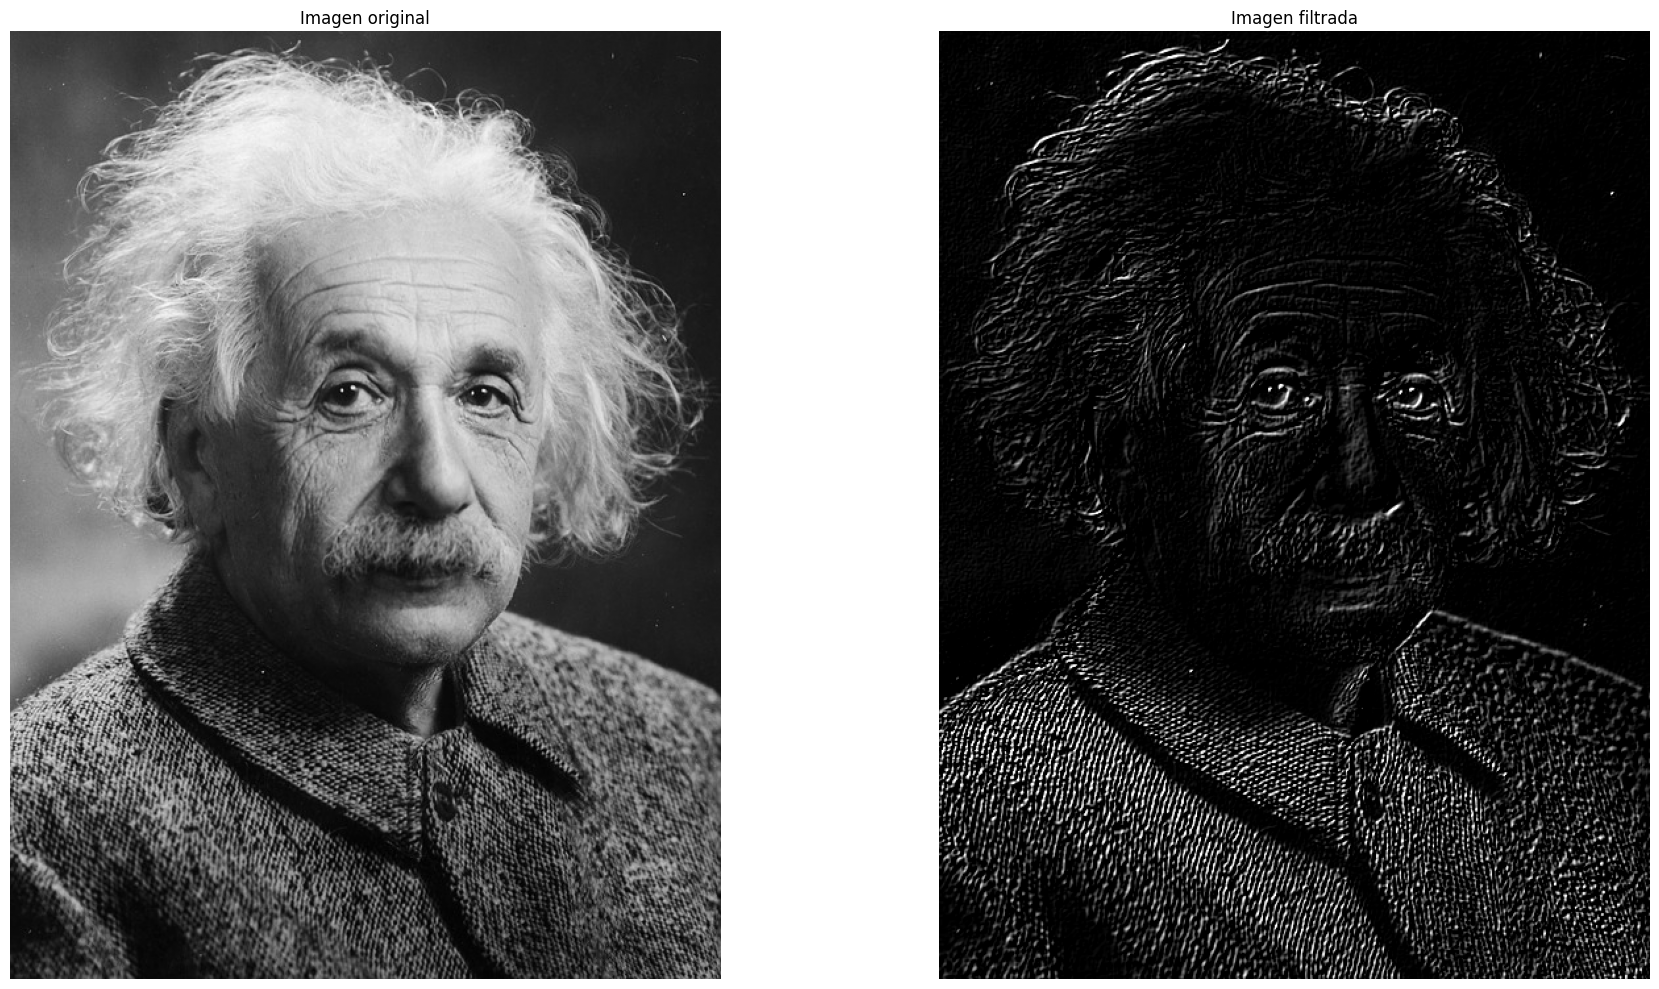

In [22]:
#1. Se crea un kernel de NumPy de 3x3 que resalte los bordes en la dirección diagonal principal:
kernel = np.array([
    [-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]
])

#2. Se aplica el Filtro
# Se carga la imagen einstein.jpg en escala de grises
img = cv2.imread(cv2.samples.findFile("Figuras_Parcial1/einstein.jpg"), cv2.IMREAD_GRAYSCALE)  # Cargar como imagen monocromática

# Se aplica el kernel personalizado a la imagen utilizando la función cv2.filter2D()
dst = cv2.filter2D(img, -1, kernel) # (imagen, profundidad de salida=-1:misma que entrada, kernel)

#3. Visualización:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(dst, cmap='gray')
axs[1].set_title('Imagen filtrada')
axs[1].axis('off')

plt.tight_layout()
plt.show()

### **Respuesta Punto 2.1:**

Los valores de -1 y +1 en el kernel son utilizados para resaltar los cambios de color o intensidad en la imagen, para este caso en las diagonales. El -1 se puso en las posiciones donde se quiere que el filtro detecte una disminución de intensidad, mientras que el +1 resalta las áreas donde la intensidad aumenta. Esto crea un contraste entre las partes de la imagen, ayudando al filtro a detectar los bordes donde ocurre un cambio abrupto en los colores o luces. Si se cambia estos valores por otros, como -2 y +2, el contraste será más fuerte, haciendo que el filtro resalte los bordes con más claridad. Si se usa valores más pequeños, como -0.5 y +0.5, el contraste será más suave, detectando cambios menos intensos.

---

### Punto 3: Limpieza de Imagen con Transformaciones Morfológicas

Se proporciona una imagen binaria (`fingerprint.jpg`) que contiene una huella dactilar con "cortes" (ruido negro) en las crestas y "puntos" (ruido blanco) en los valles. Su tarea es limpiar esta imagen para obtener crestas continuas y valles limpios.

1.  **Cargue la imagen** `fingerprint.jpg` y asegúrese de que esté en formato binario (blanco y negro).
2.  **Diseñe y aplique una secuencia de transformaciones morfológicas** (erosión, dilatación, apertura, cierre) para lograr los siguientes objetivos:
    *   Eliminar los pequeños puntos blancos en las áreas negras.
    *   Conectar las líneas de las crestas que están rotas.
3.  **Justifique su elección**: Explique por qué eligió cada operación y en qué orden las aplicó para obtener el resultado deseado.
4.  **Muestre el resultado final** junto a la imagen original ruidosa.

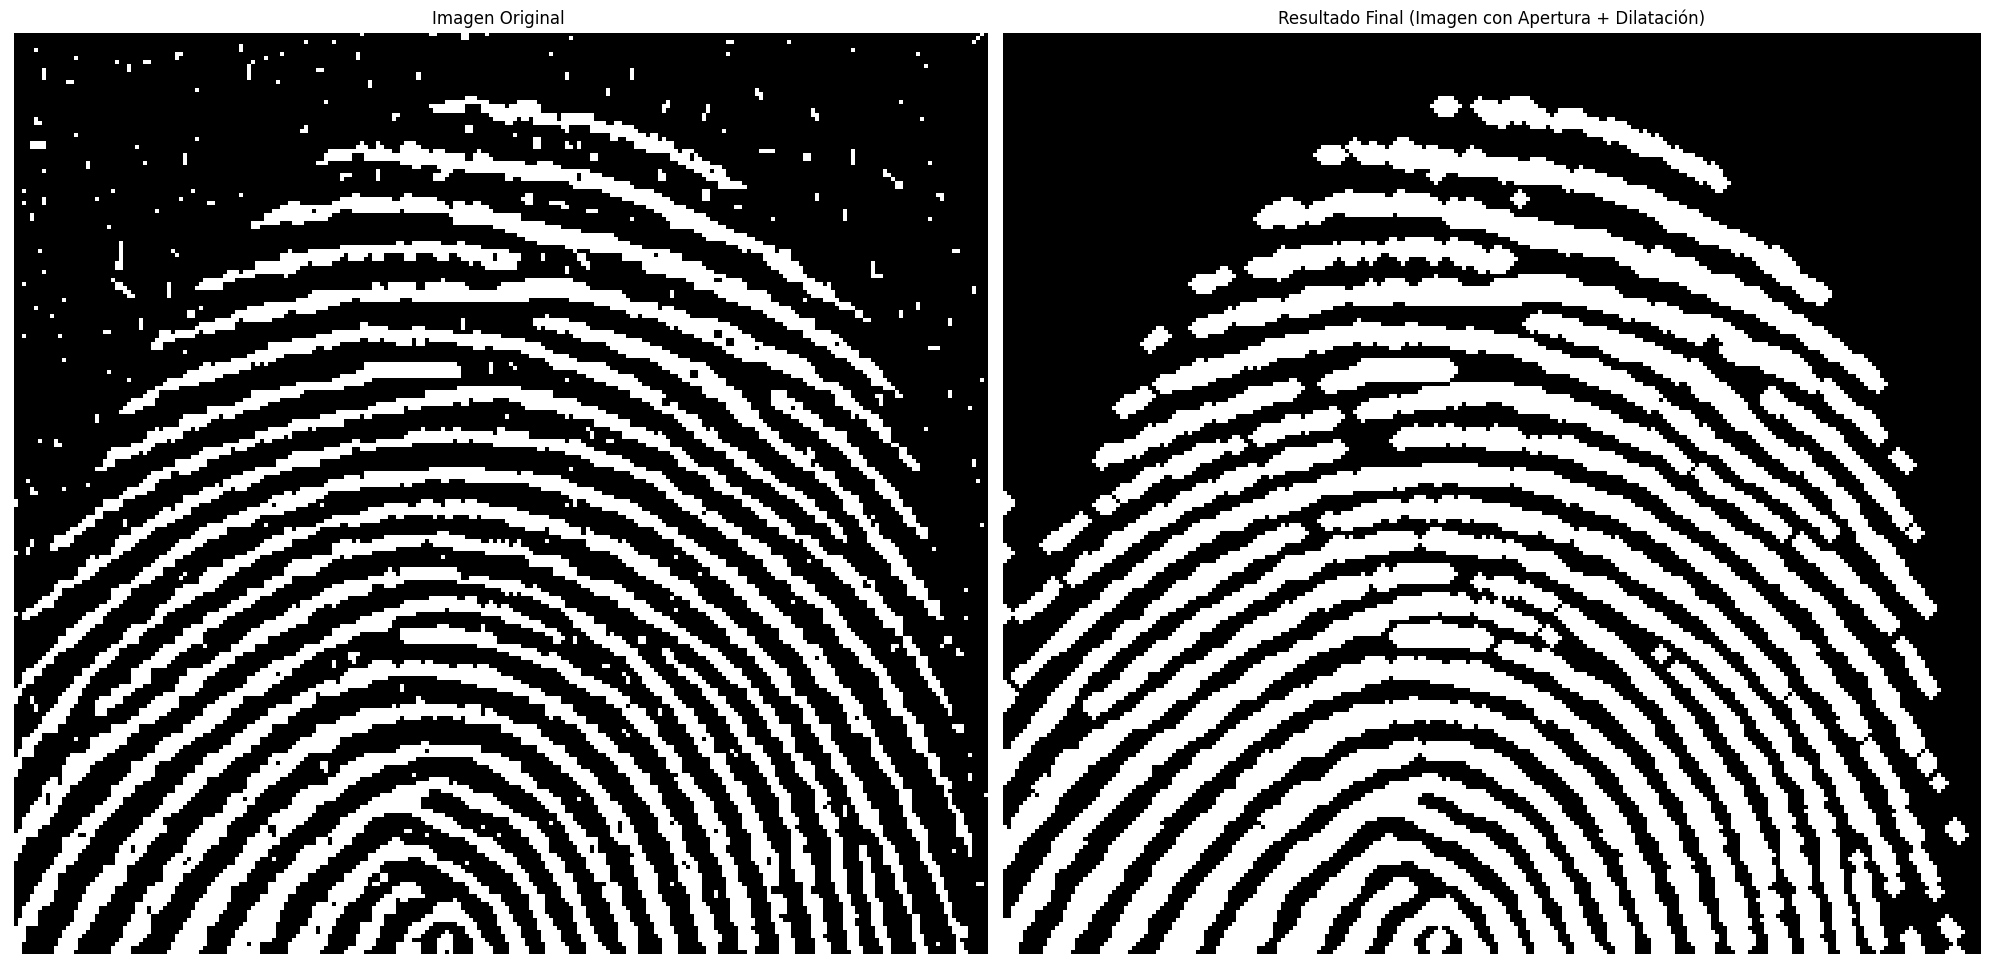

In [23]:
#Se carga la imagen en escala de grises
img = cv2.imread("Figuras_Parcial1/fingerprint.jpg", cv2.IMREAD_GRAYSCALE) / 255

# Se aplica un mbral para convertir la imagen en una imagen Binaria
img = np.where(img>0.5,1,0).astype(np.uint8) * 255

# Crear un kernel 3x3 para la operación morfológica de Elipse
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))  # (tipo de forma de Elpise, tamaño del kernel)

# Se aplica Apertura
apertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Seguido se aplica la dilatación
dilation = cv2.dilate(apertura, kernel, iterations=1)

#Resultados
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Se muestra la imagen original
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Se muestra la imagen con Dilatacion luego de la apertura
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Resultado Final (Imagen con Apertura + Dilatación)')
axs[1].axis('off')

plt.tight_layout()
plt.show()

### **Respuesta Punto 3.3:**

Se eligieron las siguientes operaciones en este orden para obtener el resultado deseado:

* Apertura (Erosión + Dilatación): Se aplicó primero la apertura para eliminar el ruido blanco pequeño (puntos dispersos en los valles) sin afectar las crestas de la huella. La erosión reduce las pequeñas imperfecciones, y la dilatación de seguido ayuda a restaurar cualquier estructura eliminada sin afectar demasiado las crestas principales.

* Dilatación: Después de la apertura, se aplicó dilatación para unir las crestas rotas. La dilatación expande las áreas blancas (para este caso las crestas) y mejora la continuidad de las líneas, restaurando las crestas que podrían haber quedado separadas tras la erosión inicial de la apertura.

---


### Punto 4: Segmentación de Múltiples Colores

Utilizando la imagen de las bolas de colores proporcionada (`colored_balls.png`), su tarea es segmentar y aislar únicamente las bolas de color **naranja, rosado y amarillo**.

1.  **Cargue la imagen** y analice sus características de color.
2.  **Seleccione el espacio de color** que considere más adecuado para esta tarea y **justifique** por qué es superior a otros (como BGR) para la segmentación por color en este escenario. Convierta la imagen a este espacio.
3.  **Defina los rangos de color** necesarios para identificar los píxeles correspondientes a los colores naranja, rosado y amarillo. Deberá crear una máscara para cada color.
4.  **Combine las máscaras** individuales en una sola máscara final que contenga todos los objetos de los tres colores de interés.
5.  **Aplique la máscara combinada** a la imagen original para mostrar únicamente las bolas de los colores seleccionados sobre un fondo negro.
6.  **Muestre los resultados**: Presente la imagen original, la máscara combinada final y el resultado de la segmentación.

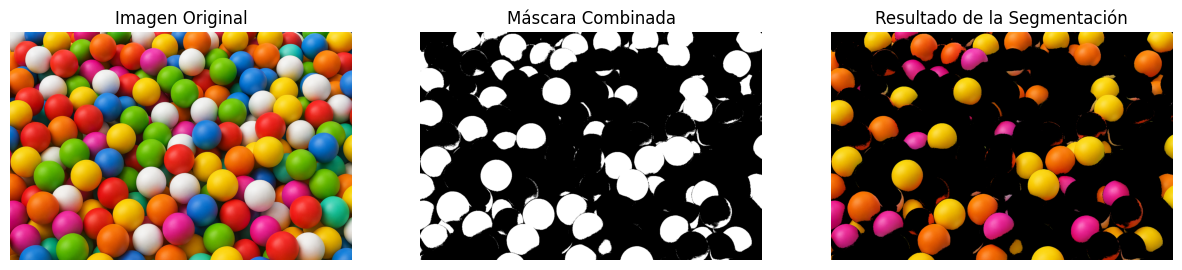

In [24]:
# Cargar la imagen
img = cv2.imread("Figuras_Parcial1/colored_balls.png")

# Convertir la imagen de BGR a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir los rangos de color en HSV para naranja, rosado y amarillo
# Estos valores pueden necesitar ajustes dependiendo de la iluminación y el contraste de la imagen

# Rango para el color Naranja
lower_orange = np.array([5, 150, 150])
upper_orange = np.array([25, 255, 255])

# Rango para el color Rosado
lower_pink = np.array([140, 50, 150])
upper_pink = np.array([170, 255, 255])

# Rango para el color Amarillo
lower_yellow = np.array([25, 150, 150])
upper_yellow = np.array([35, 255, 255])

# Crear las máscaras para cada color utilizando cv2.inRange()
mask_orange = cv2.inRange(img_hsv, lower_orange, upper_orange)
mask_pink = cv2.inRange(img_hsv, lower_pink, upper_pink)
mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# Combinar las máscaras
combined_mask = mask_orange | mask_pink | mask_yellow

# Aplicar la máscara combinada a la imagen original
result = cv2.bitwise_and(img, img, mask=combined_mask)

# Mostrar los resultados
plt.figure(figsize=(15,15))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis('off')

# Máscara combinada
plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title("Máscara Combinada")
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Resultado de la Segmentación")
plt.axis('off')

plt.show()


---
### Punto 5: Detección y Conteo de Objetos mediante Contornos

El objetivo de este punto es desarrollar un script que cuente el número de objetos en la imagen `circles.png`. Para ello, debe combinar varias de las técnicas vistas en clase.

1.  **Cargue la imagen `circles.png`** y conviértala a escala de grises.
2.  **Binarice la imagen**: Utilice el **método de Otsu** para encontrar un umbral óptimo y segmentar los círculos del fondo.
3.  **Limpieza de la máscara**: Es posible que la binarización no sea perfecta. Aplique la operación morfológica que considere más adecuada (apertura o cierre) para eliminar posibles ruidos (pequeños puntos negros o blancos). Justifique su elección.
4.  **Encuentre los contornos**: Utilice `cv2.findContours()` sobre la imagen binaria limpia para detectar cada objeto individualmente.
5.  **Dibuje y cuente**:
    *   Dibuje todos los contornos encontrados sobre la imagen original a color (cárguela de nuevo para no dibujar sobre la versión gris). Use un color visible (ej: verde) y un grosor de línea de 2.
    *   Imprima en la consola el número total de contornos detectados.
    *   Muestre la imagen final con los contornos dibujados.

Total de contornos detectados: 164


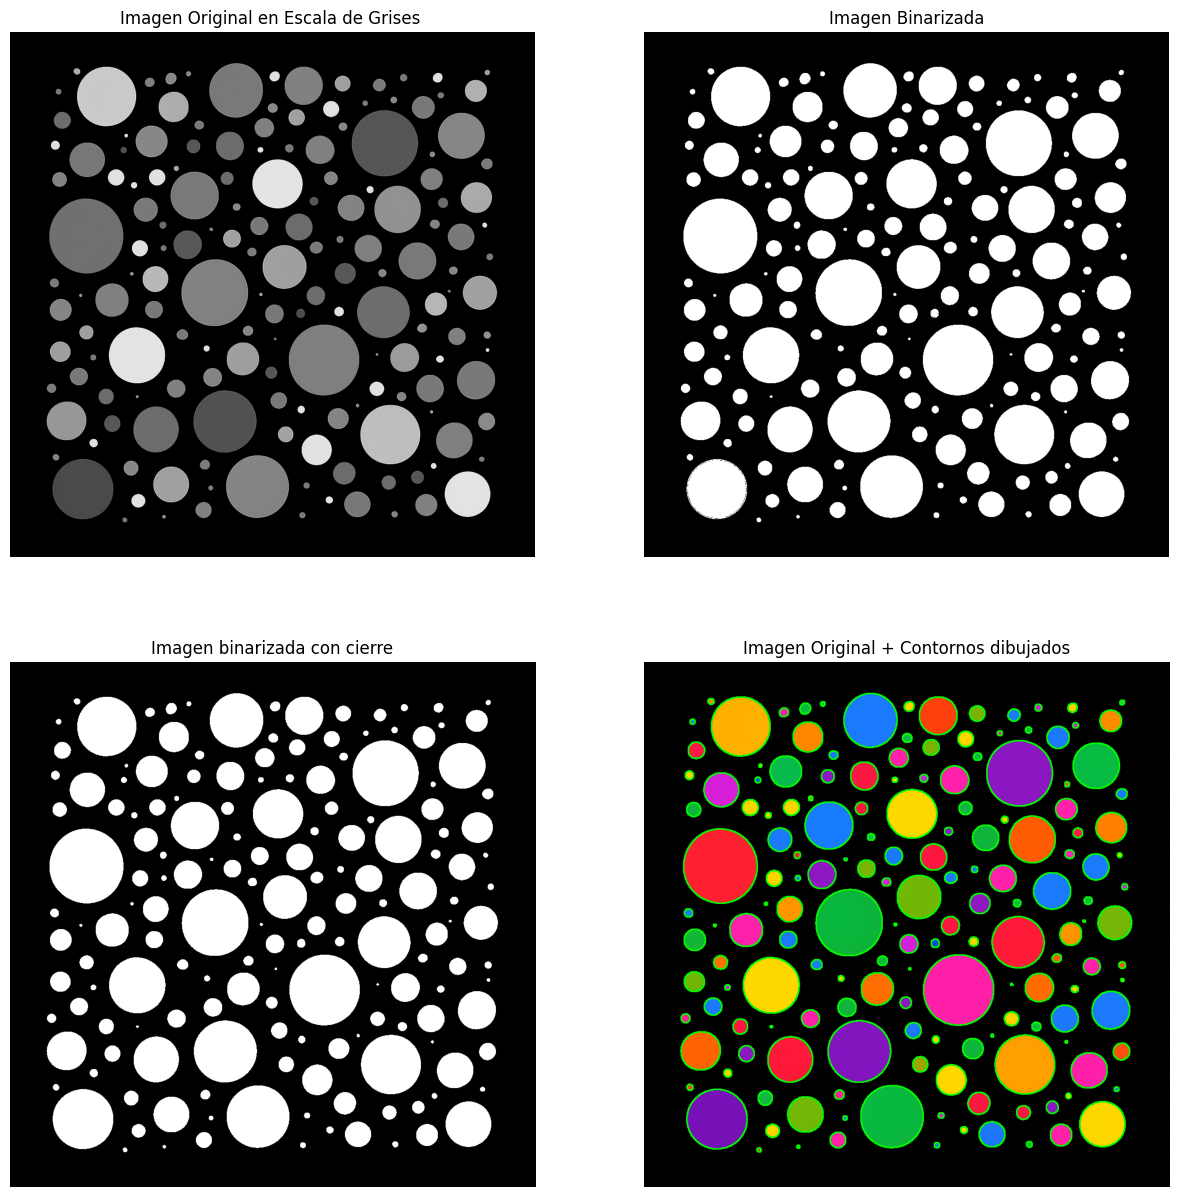

In [25]:
# 1. Se carga la imagen y se convierte a Escala de Grises
img = cv2.imread("Figuras_Parcial1/circles.png", cv2.IMREAD_GRAYSCALE)

# 2. Se binariza la imagen utilizando el método de Otsu
_, th_otsu = cv2.threshold (img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Se realiza limpieza de la mascara mediante la operacion morfológica Cierre
# Se crea un Kernel 3x3 para esta operación morfológica
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# Se aplica cierre
cierre = cv2.morphologyEx(th_otsu, cv2.MORPH_CLOSE, kernel)

# 4. Una vez tenemos una máscara binaria (con Otsu), podemos encontrar y dibujar contornos
_, th_bin = cv2.threshold(cierre, 127, 155, cv2.THRESH_BINARY)
contours, _  = cv2.findContours(th_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#   Se dibuja los contornos sobre la imagen original a color
img_color = cv2.imread("Figuras_Parcial1/circles.png")
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 2)

# 5. Se imprime el número total de contornos detectados
print(f"Total de contornos detectados: {len(contours)}")

# Resultados
plt.figure(figsize=(15,15))

# Imagen original en Escala de Grises
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original en Escala de Grises ")
plt.axis('off')

# Imagen Original binarizada
plt.subplot(2, 2, 2)
plt.imshow(th_otsu, cmap='gray')
plt.title("Imagen Binarizada")
plt.axis('off')

# Imagen al aplicarle cierre a la imagen original binarizada
plt.subplot(2, 2, 3)
plt.imshow(cierre, cmap='gray')
plt.title("Imagen binarizada con cierre")
plt.axis('off')

# Imagen Original + dibujo de todos los contornos encontrados
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original + Contornos dibujados")
plt.axis('off')

plt.show()
#cv2_imshow(th_otsu)

### **Respuesta Punto 5:**
Se eligió la operación morfológica de cierre en lugar de apertura porque el objetivo fue eliminar los pequeños puntos negros de ruido que aparecieron al binarizar la imagen, esto para no afectar los círculos blancos. Para este caso el cierre, que combina dilatación seguida de erosión, ayudo a eliminar el ruido negro que aparecio, manteniendo intactos los circulos blancos. Por el contrario, la apertura sería más adecuada para eliminar manchas blancas o separar objetos conectados, lo cual no es necesario en este caso.

---